In [1]:
""


from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
#device = torch.device(device)
print(f"{device = }")
#loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
#loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
#loader_train = loader.get_train_loader()
#all_graphs_weights_df.to_parquet('./results/data/non_filtered_graphs_weights_from_explainer.parquet.gzip', compression = 'gzip')

all_graphs_weights_df = pd.read_parquet('./results/data/data_for_R/Masked_graphs_weights_from_explainer.parquet.gzip')

print(f"{all_graphs_weights_df.shape=}")

/DeepenData/.miniconda/envs/geo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device = 'cuda:0'
all_graphs_weights_df.shape=(39602, 4921)


((595, 4921), (39602,))

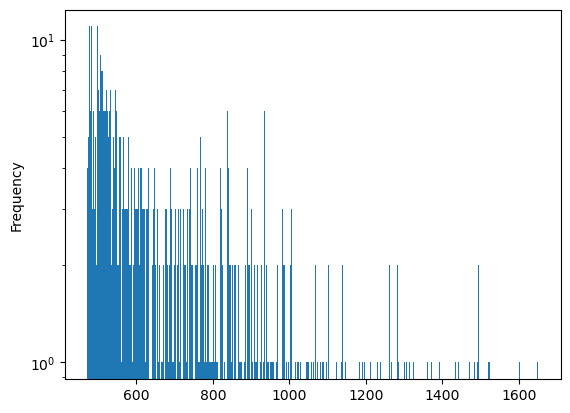

In [2]:
edge_mask = all_graphs_weights_df.sum(axis=1) > np.percentile(all_graphs_weights_df.sum(axis=1), 98.5)


filtered_graph_weights_df = all_graphs_weights_df.loc[  edge_mask, :]

filtered_graph_weights_df.sum(axis=1).plot.hist(logy = True, bins=500)
filtered_graph_weights_df.shape, edge_mask.shape

<AxesSubplot:ylabel='Frequency'>

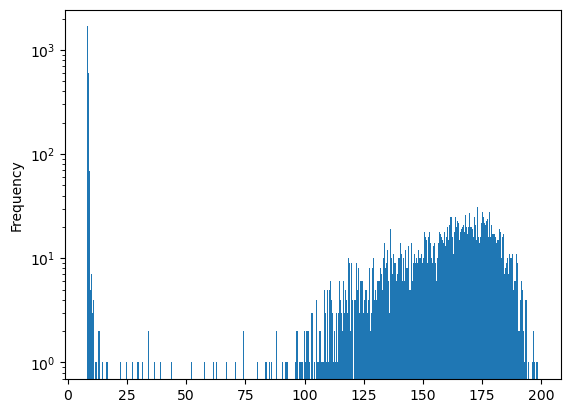

In [3]:
filtered_graph_weights_df.sum(axis=0).plot.hist(logy = True, bins=500)


In [4]:
#loader_path = "./results/dataloaders/MASKED_loader_Concen_plus_Fluxes.pt"
#loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
#loader_train = loader.get_train_loader()
#train_labels = []
#for graph in tqdm.tqdm(loader_train.dataset):
#    train_labels.append(graph.y.cpu().item())
#train_labels.__len__()

train_labels = pd.read_csv("./results/data/data_for_R/Mask_train_labels.csv").drop('Unnamed: 0', axis=1)['0']

filtered_graph_weights = filtered_graph_weights_df.transpose() #.columns = train_labels
filtered_graph_weights["Label"] = list(train_labels)

filtered_graph_weights.reset_index(drop=True, inplace=True)
filtered_graph_weights.columns = [str(col) for col in filtered_graph_weights.columns]
#filtered_graph_weights.to_parquet('./results/data/filtered_graph_weights.parquet.gzip', compression = 'gzip')
filtered_graph_weights

,18,58,158,262,389,390,527,590,591,592,...,38261,38350,38370,38433,38511,38878,38949,39016,39034,Label
0,0.201676,0.141386,0.072966,0.147324,0.222213,0.505281,0.112710,0.073290,0.406838,0.340756,...,0.237067,0.193473,0.191747,0.181169,0.346934,0.129519,0.412069,0.045730,0.194454,Control
1,0.190264,0.136036,0.209336,0.232720,0.318154,0.423306,0.370856,0.266277,0.325253,0.027630,...,0.197303,0.179523,0.173756,0.122923,0.368717,0.133764,0.264573,0.163743,0.175651,Control
2,0.013443,0.013039,0.015433,0.014327,0.012767,0.018557,0.015859,0.014944,0.016725,0.014262,...,0.012299,0.013479,0.013566,0.014407,0.015749,0.015457,0.013717,0.015390,0.013634,PKU
3,0.012456,0.013882,0.018174,0.013478,0.012806,0.013468,0.020335,0.020185,0.022817,0.018230,...,0.011906,0.012382,0.012548,0.020438,0.013802,0.013709,0.013700,0.018223,0.012679,PKU
4,0.013103,0.013243,0.014007,0.012874,0.012795,0.015356,0.015060,0.014675,0.015394,0.013676,...,0.012838,0.013049,0.013224,0.014092,0.014780,0.015171,0.014532,0.013794,0.013311,PKU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.216761,0.307373,0.404104,0.166572,0.365785,0.540996,0.557591,0.319138,0.431669,0.169238,...,0.194191,0.217292,0.196903,0.189832,0.398563,0.165327,0.014011,0.395941,0.210425,Control
4917,0.013710,0.013598,0.014546,0.013623,0.013507,0.013645,0.013717,0.013140,0.013912,0.013731,...,0.013688,0.013781,0.013706,0.013796,0.014244,0.014295,0.013871,0.014959,0.013731,PKU
4918,0.013372,0.015655,0.013589,0.012598,0.013492,0.016335,0.015068,0.014358,0.015426,0.014116,...,0.012555,0.013449,0.013439,0.013948,0.014639,0.014537,0.013938,0.013671,0.013478,PKU
4919,0.232404,0.424192,0.244546,0.215115,0.149439,0.022136,0.172082,0.042384,0.048561,0.083273,...,0.241668,0.232638,0.232157,0.271022,0.138222,0.250677,0.424937,0.230095,0.228870,Control


In [5]:
PYG_graph = torch.load("./results/graphs_from_PYG_and_NX/PYG_graph_Concen_plus_Fluxes.pt")


NX_graph  = nx.read_gpickle("./results/graphs_from_PYG_and_NX/grafo_nx_Concen_plus_Fluxes.gpickle")

In [6]:
edge_0_node_idxs =  PYG_graph.edge_index[0,:]
edge_1_node_idxs =  PYG_graph.edge_index[1,:]
edge_0_nodes     = [list(NX_graph.nodes)[i] for i in  edge_0_node_idxs]
edge_1_nodes     = [list(NX_graph.nodes)[i] for i in  edge_1_node_idxs]

edges_df = pd.DataFrame({'node1': edge_0_nodes, 'node2':edge_1_nodes})



edges_node_names_explainer_subgraphs = pd.concat([edges_df, all_graphs_weights_df], axis=1).loc[edge_mask,:]



edges_node_names_explainer_subgraphs.to_csv("./results/data/data_for_R/Masked_edges_node_names_explainer_subgraphs.csv")
pd.concat([edges_df, all_graphs_weights_df], axis=1).to_parquet("./results/data/data_for_R/Masked_ALL_edges_node_names_explainer_subgraphs.parquet.gzip", compression='gzip')